In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
df = pd.read_csv('./master.csv')
df = df.drop(['HDI for year'],  axis=1)
print('The number of training examples before dropna: ', len(df))
df = df.dropna()
print('The number of training examples after dropna: ', len(df))
print('Total number of features: ', len(df.columns))
df.head()

The number of training examples before dropna:  27820
The number of training examples after dropna:  27820
Total number of features:  11


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [3]:
for col in df.columns:
    print('Number of unique {}:'.format(col), len(np.unique(df[col])))
print('Total number of suicide cases: {}'.format(sum(df.suicides_no)))

Number of unique country: 101
Number of unique year: 32
Number of unique sex: 2
Number of unique age: 6
Number of unique suicides_no: 2084
Number of unique population: 25564
Number of unique suicides/100k pop: 5298
Number of unique country-year: 2321
Number of unique  gdp_for_year ($) : 2321
Number of unique gdp_per_capita ($): 2233
Number of unique generation: 6
Total number of suicide cases: 6748420


In [4]:
for col in df.columns:
    print(col, '---',df[col].dtype)

country --- object
year --- int64
sex --- object
age --- object
suicides_no --- int64
population --- int64
suicides/100k pop --- float64
country-year --- object
 gdp_for_year ($)  --- object
gdp_per_capita ($) --- int64
generation --- object


In [5]:
gdp = []
# convert gdp_for_year from string to ints 
for i, string in enumerate(df[df.columns[8]]):
    gdp.append(int(string.replace(',','')))

# put the results in a new column    
gdp_frame =pd.DataFrame()
gdp_frame['gdp'] = np.array(gdp)
new = pd.concat((df,gdp_frame),axis=1)

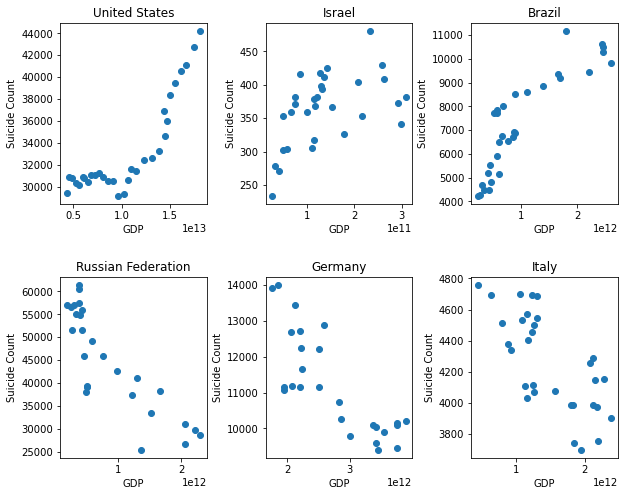

In [6]:
suicide_gdp(new, 'United States','Israel', 'Brazil', 'Russian Federation', 'Germany', 'Italy')

In [7]:
cont = pd.read_csv('./countryContinent.csv',encoding = "ISO-8859-1")

In [8]:
listed = []
count_list = []
for country in df['country']:
    if country not in count_list:
        count_list.append(country)
        if country == 'Saint Vincent and Grenadines':
            country = 'Saint Vincent and the Grenadines'
        elif country == 'United Kingdom':
            country = 'United Kingdom of Great Britain and Northern Ireland'
        elif country == 'United States':
            country = 'United States of America'
        elif country == 'Macau':
            country = 'Macao'
        elif country == 'Republic of Korea':
            country = "Korea (Democratic People's Republic of)"
    
        listed.append(cont[cont['country'] == country].continent.to_list()[0])

cont_dict = {}         
for i in range(len(count_list)):   
    cont_dict[count_list[i]] = listed[i]


new_col = pd.DataFrame()
new_col['continent'] = df['country']
new_col = new_col.replace({"continent": cont_dict})

new_df = pd.concat((new_col, df), axis=1)
new_df.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Europe,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Europe,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Europe,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Europe,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Europe,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


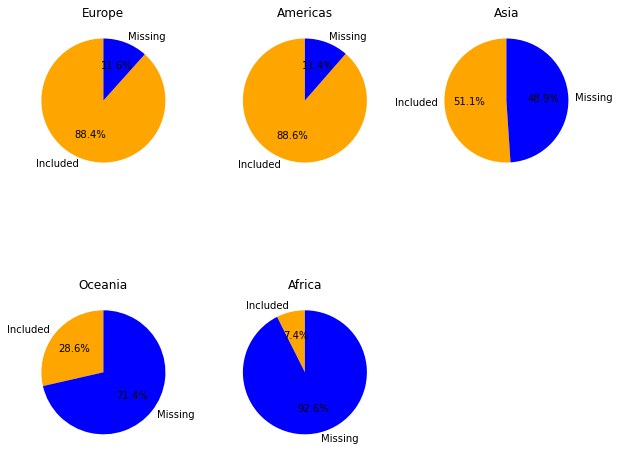

In [9]:
# country percentage:
actual = {'Asia': 47, 'Europe': 43, 'Americas': 35, 'Oceania': 14, 'Africa': 54}
dict1 = {}
df_count = new_df[['continent','country']]
category_dict = categorize(df_count['continent'])
df_count = df_count.replace({"continent": category_dict})

df_count = df_count.groupby(['country']).mean()
new_dict = dict([(value, key) for key, value in category_dict.items()])
df_count = df_count.replace({"continent": new_dict})

for c in df_count['continent']:
    if c not in dict1:
        dict1[c] = 1
    else:
        dict1[c] +=1 

        
fig, ax =  plt.subplots(2,3, figsize = (10,10))

iterable = iter(dict1)
for i in range(2):
    for j in range(3):
        
        try:
            cont = next(iterable)
            labels= ['Included', 'Missing']
            colors=['orange','blue']
            sizes= [dict1[cont], actual[cont]-dict1[cont]]
            ax[i,j].pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
            ax[i,j].set_title(cont)
            plt.axis('equal')
        except:
            fig.delaxes(ax[i, j])
plt.subplots_adjust(wspace=0.3, hspace=0)
plt.show()

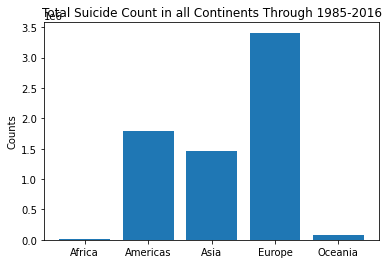

In [10]:
cont_list = []
count_list = []
for cont in np.unique(new_df['continent']):
    cont_list.append(cont)
    count_list.append(np.sum(new_df[new_df['continent']== cont].suicides_no))
plt.bar(cont_list, count_list)
plt.title('Total Suicide Count in all Continents Through 1985-2016')
plt.ylabel('Counts')
plt.show()

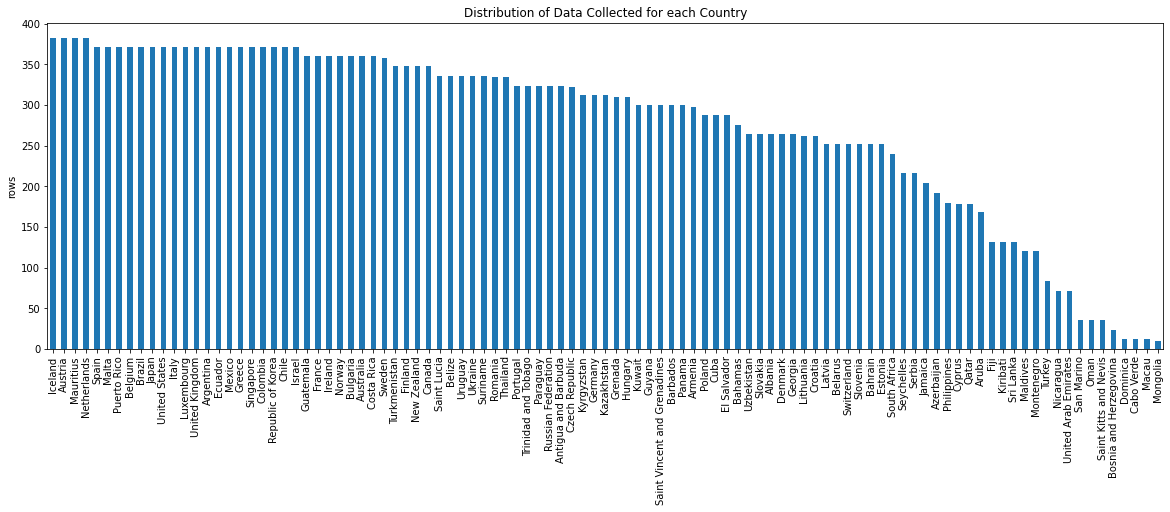

In [11]:
fig = plt.figure(figsize=(20,6))
df['country'].value_counts().plot(kind='bar')
plt.title("Distribution of Data Collected for each Country")
plt.ylabel('rows')
plt.show()

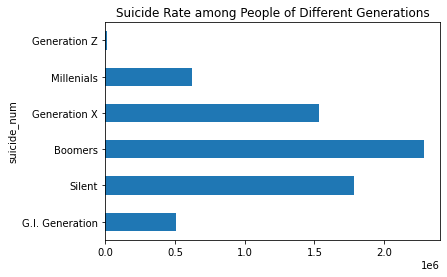

In [12]:
period = pd.DataFrame({'period': [2016-1943, 2016-1901, 2016-1965, 2016-2001,2016-1980, 2016-1925]})
time = pd.DataFrame({'time': [1943, 1901, 1965, 2001,1980, 1925]})
df1 = df[['suicides_no', 'generation']]
df1 = df1.groupby(['generation']).agg(sum)
df1.reset_index(inplace=True)
df2 = pd.concat((df1,period), axis=1)
df2 = pd.concat((df2,time), axis=1)
df2 =df2.set_index('generation')
df2 = df2.sort_values(by=['time'])
df2['normalized']= df2['suicides_no']/df2['period']
df2['suicides_no'].plot.barh()
plt.title('Suicide Rate among People of Different Generations')
plt.ylabel('suicide_num')
plt.show()

In [13]:
df = pd.read_csv('./master.csv')
df = df.drop(['HDI for year'],  axis=1)
df = df.drop(['generation'],  axis=1)
df = df.dropna()

gdp = []
# convert gdp_for_year from string to ints 
for i, string in enumerate(df[df.columns[8]]):
    gdp.append(int(string.replace(',','')))
    

# put the results in a new column    
gdp_frame =pd.DataFrame()
gdp_frame['gdp'] = np.array(gdp)
new = pd.concat((df,gdp_frame),axis=1)

new=new.rename(columns={"suicides/100k pop": "suicides_per_100k"})

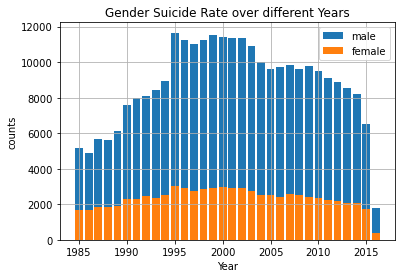

In [14]:
suicide_gender_year(new)

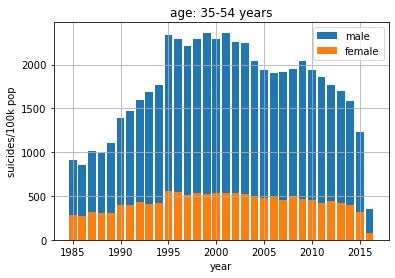

In [15]:
suicides_age_year(new, '35-54 years')

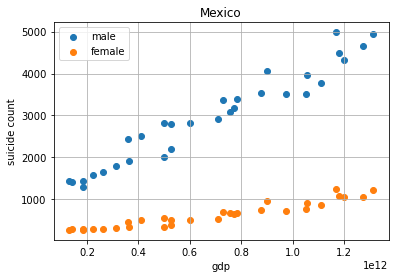

In [16]:
suicides_gdp_gender(new, 'Mexico')

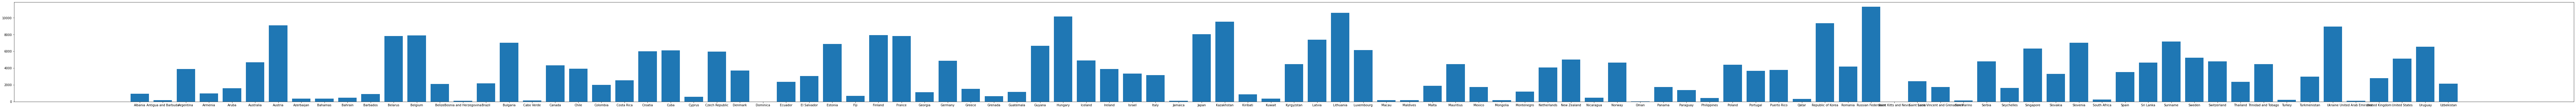

In [17]:
countries_suicide_rate(new)

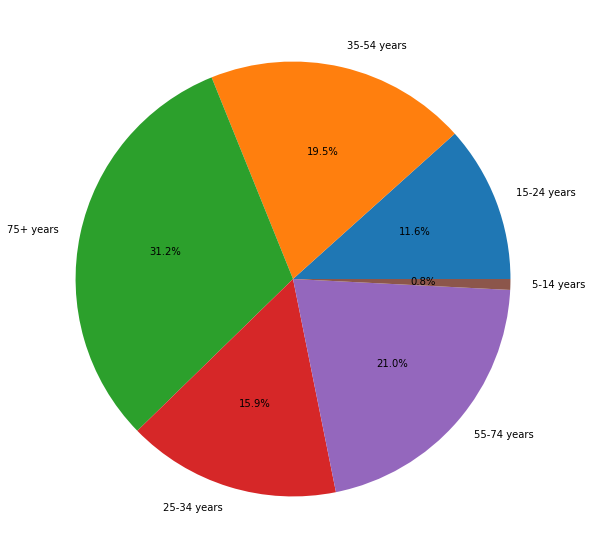

In [18]:
suicides_per100k_age(new)

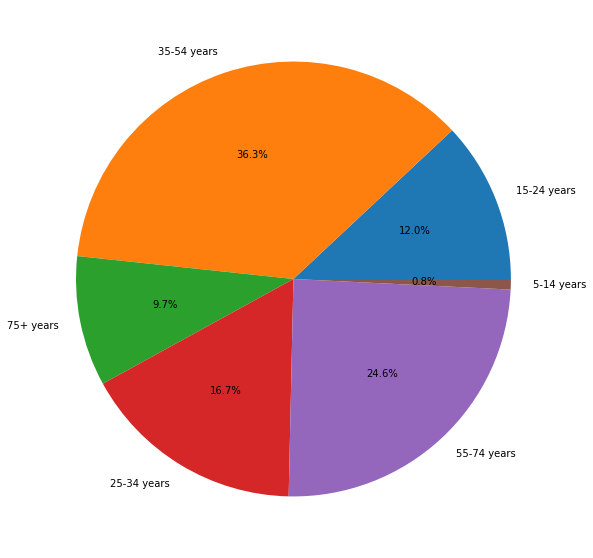

In [19]:
suicides_no_age(new)

In [20]:
df = pd.read_csv('./master.csv')

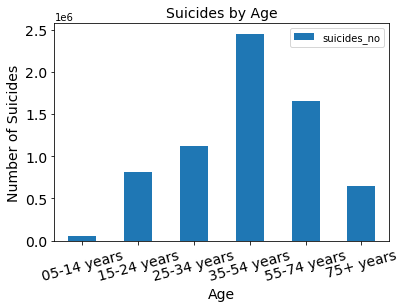

In [21]:
suicide_by_age(df)

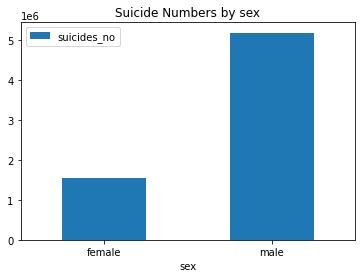

In [22]:
suicide_by_sex(df)

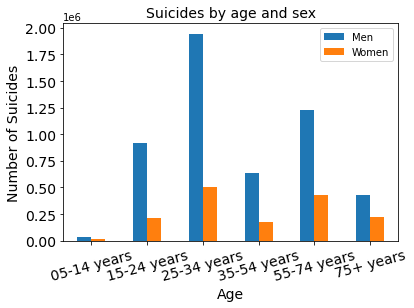

In [23]:
suicide_by_age_range(df)

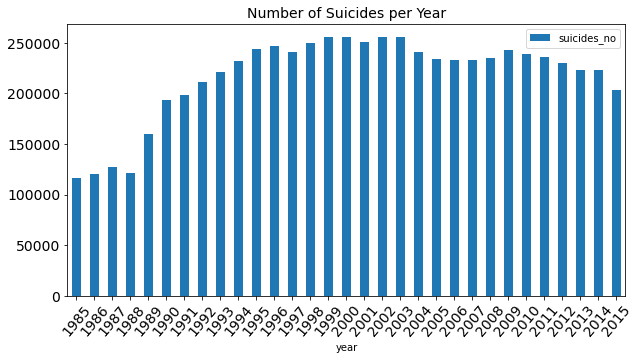

In [24]:
suicide_by_year(df)

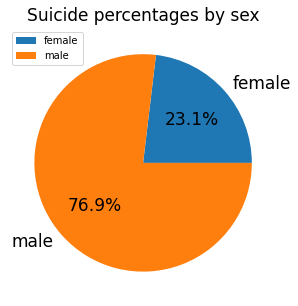

In [25]:
suicide_by_age_pie(df)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


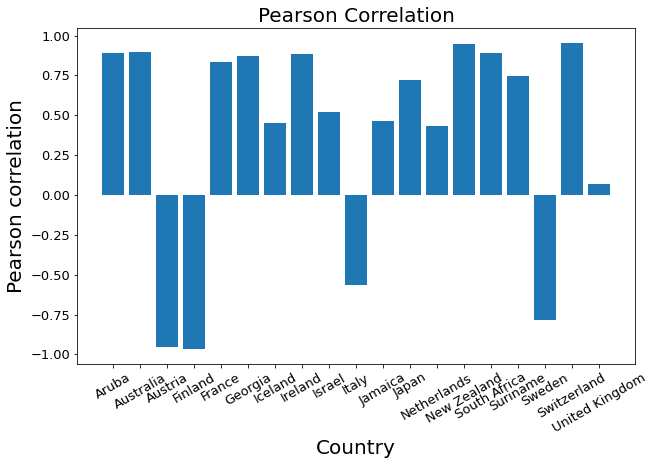

In [26]:
df = pd.read_csv('./master.csv')
pear=suicide_pearson_population(df)


country_list=np.unique(df['country'])
year_list=list(np.unique(df['year']))

year_list.remove(1985)
year_list.remove(1986)
year_list.remove(2016)
        
fig = plt.figure(figsize=(10,6.18))

p_c_list=np.array(list(country_list[4:7])+list(country_list[32:35])+list(country_list[41:47])+list(country_list[61:63])+list(country_list[85:86])+list(country_list[88:91])
                  +list(country_list[97:98]))
p_p=np.array(list(pear[4:7])+list(pear[32:35])+list(pear[41:47])+list(pear[61:63])+list(pear[85:86])+list(pear[88:91])+list(pear[97:98]))


plt.bar(p_c_list,p_p)
plt.ylabel('Pearson correlation',fontsize='20')
plt.xlabel("Country",fontsize='20')

plt.xticks(rotation=30,fontsize="100");
plt.yticks(fontsize="160");
plt.title('Pearson Correlation',fontsize='20')
plt.tick_params(labelsize=13)

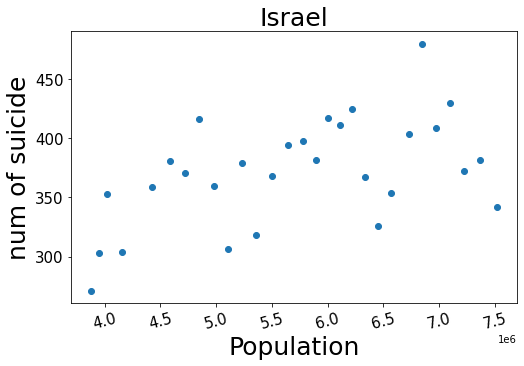

In [27]:
Sui_by_pop(df, 'Israel')

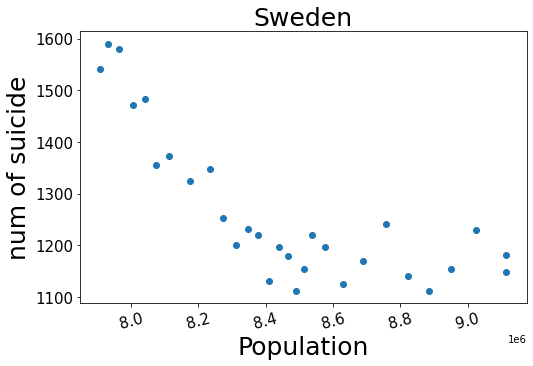

In [28]:
Sui_by_pop(df, 'Sweden')